# Tensorflow Activation Functions

## ANN Python Libraries
- **Tensorflow**
- Pytorch
- Jax

**Keras** is built into TensorFlow as its official high-level API.So, when you write `tf.keras`, you're using TensorFlow — just with an easier, more elegant interface. Basically **Keras** is an abstraction on top of **TensorFlow** which simplifies to code.

https://keras.io/

**Keras** is a deep learning API designed for human beings, not machines. **Keras** focuses on debugging speed, code elegance & conciseness, maintainability, and deployability. **When you choose Keras, your codebase is smaller, more readable, easier to iterate on.**

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Import packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create a Basic Tensor
x = tf.constant([-2, -1, 0, 1, 2, 3, 4, 5], dtype=tf.float32)
print(x)


tf.Tensor([-2. -1.  0.  1.  2.  3.  4.  5.], shape=(8,), dtype=float32)


In [ ]:
# Applying Activation Function
## 1. Sigmoid function --> generate probability of 0 and 1.
tf.nn.sigmoid(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.11920294, 0.2689414 , 0.5       , 0.73105854, 0.8807971 ,
       0.95257413, 0.98201376, 0.9933072 ], dtype=float32)>

In [ ]:
## 2. TanH function --> retains the negative value
tf.nn.tanh(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([-0.9640276 , -0.7615942 ,  0.        ,  0.7615942 ,  0.9640276 ,
        0.9950547 ,  0.9993292 ,  0.99990916], dtype=float32)>

In [ ]:
## 3. ReLU
tf.nn.relu(x)

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0., 0., 0., 1., 2., 3., 4., 5.], dtype=float32)>

### Defining Layers in ANN using Keras

In [ ]:
# Create Layers in ANN
## units tells you how many neurons you want in a layer.
tf.keras.layers.Dense(units=1, activation='relu')

<Dense name=dense, built=False>

# Use Case: MNIST Hand-written Digit Recognitions
**Train a nural network that could study the hand-written pattern and predict the digit.**

**Objectives:**
1. Build and train basic ANN using Tensorflow and Keras
2. Achieve maximum accuracy
3. Undestand the impact of no of nurons, no of layers, no of epocs, learning rate, and batchsize.
4. Evaluate the ANN and study the losses


In [4]:
# Step1: Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
#mnist is a dataset of handwritten digits (0–9), commonly used for training image classification models.
from tensorflow.keras.datasets import mnist

In [13]:
# Step2: load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# assert verifies the incoming data shape
assert x_train.shape == (60000, 28, 28) # training images (60,000 samples of 28×28 grayscale images). all these samples are related to 0-9 digit images
assert y_train.shape == (60000,) # corresponding training labels (digits 0–9).
assert x_test.shape == (10000, 28, 28) # test images (10,000 samples of 28×28 grayscale images).
assert y_test.shape == (10000,) # corresponding test labels (digits 0–9).
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


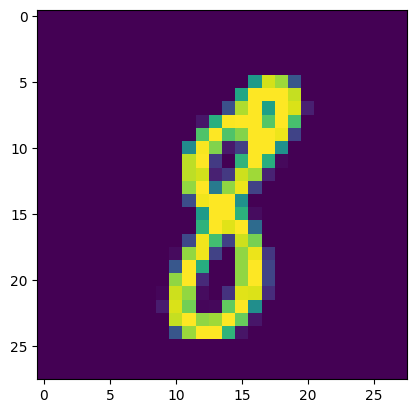

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[300]) # to display an image from the MNIST dataset.
#

In [15]:
# print(x_train.info())
print(x_train[300]) # It's 28 x 28 array representing 28x28 pixel image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 138 238
  217  68   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 150 254 254
  254 232   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  63 224 254 145
  254 240  22   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  15 160 253 25

In [16]:
# Step3: Scale down the pixel
## the array above is an array of pixel
## pixel range is 0-255. Scale it down
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train[300])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
# Step04: Flatten the image data (model expects data in flatten structure)
print(x_train.shape) # (60000, 28, 28) # 60000 images. each image is 28x28 dimension array
print(x_test.shape) # (10000, 28, 28)
# (60000, 28, 28) --> (60000, 784)
x_train = x_train.reshape(-1, 28*28) # flattens each image from 28x28 2-dimensional pixel array to 786 column 1-dimensional pixel arrray
# (10000, 28, 28) --> (10000, 784)
x_test = x_test.reshape(-1, 28*28)
print(x_train.shape)
print(x_test.shape)
print(x_train[1])

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

In [38]:
# Step05: Building the ANN Layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,))) #input layer with 128 nurons
model.add(layers.Dense(64, activation='relu')) #hidden layer with 64 nurons
model.add(layers.Dense(10, activation='softmax')) #output layer with 10 nurons (its a multi-class classifier)
#

In [39]:
model.summary()
# Each image is of 784 pixels (=28 x 28)
# Every nuron in the input layer receives all 784 pixels for each image.
# param_count in input layer_1 = 128 nurons x 784 inputs  + 128 bias (one per nuron) = 100, 480 parameters for each image
# param_count in layer2 (fed from layer1 nurons) =  128 output x 64 nurons + 64 bias =  8256 parameters for each image
# param_count in layer3 (fed from layer2 nurons) = 64 output x 10 nurons + 10 bias = 650 parameters for each image

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Step6: Compile the ANN Keras Model
model.compile(optimizer='adam', #optimizer method that adjusts the weigth on backward propagation
              loss='sparse_categorical_crossentropy', #loss calculation method
              metrics=['accuracy']) #metrics to compare training vs test predication

In [41]:
# Step7: Train the ANN model
# epocs uses the validation_split to study the model accuracy
history = model.fit(x_train,
                    y_train,
                    epochs=12, # 1 epoch is one full processing of the dataset. You can 1 epoch is one full training cycle.
                    batch_size=32, # 32 batch_size mean, 60,000 images will be broken into 32 batches and processed. 1 epoch = one 32 batch processing
                    validation_split=0.2 # 20% of 60000 images will be used in the validation and loss calculation process.
                    )

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8649 - loss: 0.4718 - val_accuracy: 0.9562 - val_loss: 0.1442
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9637 - loss: 0.1193 - val_accuracy: 0.9665 - val_loss: 0.1049
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9768 - loss: 0.0766 - val_accuracy: 0.9693 - val_loss: 0.1028
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9815 - loss: 0.0579 - val_accuracy: 0.9663 - val_loss: 0.1089
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0428 - val_accuracy: 0.9732 - val_loss: 0.0931
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9895 - loss: 0.0324 - val_accuracy: 0.9733 - val_loss: 0.0999
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9703 - val_loss: 0.1213
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9922 - loss: 0.023

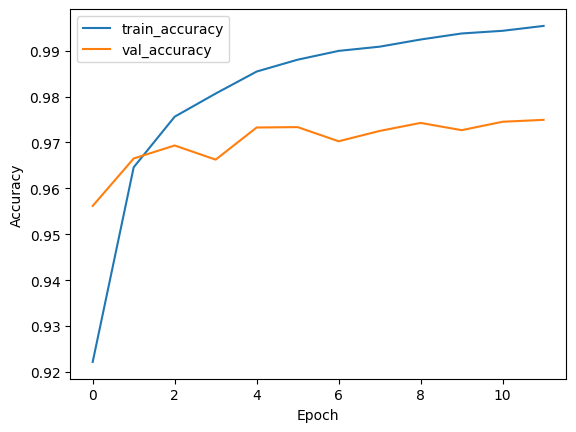

In [46]:
# Step 8: Plot Accuracy and Losses
plt.plot(history.history['accuracy'], label='train_accuracy') #accuracy on training data
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # accuracy on 20% validation data
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

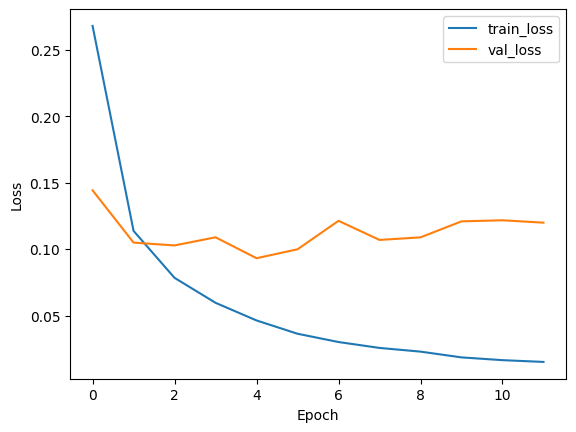

In [47]:
plt.plot(history.history['loss'], label='train_loss') #losses from training data
plt.plot(history.history['val_loss'], label = 'val_loss') #losses from validation data
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [48]:
# Step9: Predict on 10000 images that you had kept aside for testing.
y_pred = model.predict(x_test)
print(y_pred)
print(y_pred.shape)
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[3.95335857e-14 3.40788536e-10 8.06094289e-11 ... 9.99999940e-01
  3.22358785e-13 1.24764981e-08]
 [1.65875744e-12 4.77277354e-05 9.99952257e-01 ... 1.96306057e-12
  1.38905865e-08 2.17583553e-18]
 [1.58444039e-11 9.99999464e-01 7.23770768e-08 ... 5.21949017e-09
  2.99305356e-07 1.39712935e-13]
 ...
 [2.71911612e-19 6.51763520e-15 1.08732122e-23 ... 4.91297998e-15
  3.33279407e-16 1.46660999e-11]
 [5.02287838e-16 3.25952828e-12 1.18025569e-22 ... 7.52316785e-12
  6.19064531e-06 1.50116613e-18]
 [2.36338731e-15 1.25396321e-18 2.33894467e-17 ... 2.34381246e-17
  8.50698535e-16 1.48533673e-22]]
(10000, 10)
[3.95335857e-14 3.40788536e-10 8.06094289e-11 5.05335294e-08
 1.56998609e-19 1.09339045e-14 2.38003632e-21 9.99999940e-01
 3.22358785e-13 1.24764981e-08]


<Axes: >

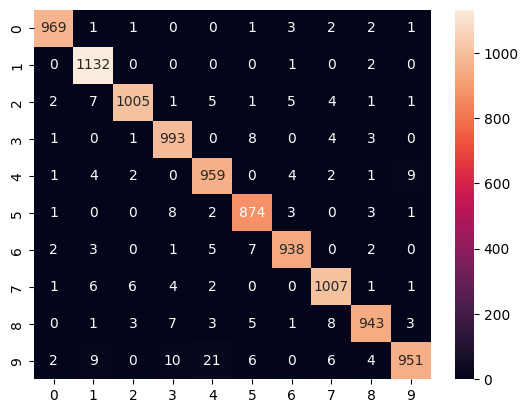

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [50]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

